# Key Finding and Business Insights

Exploratory Data Analysis (EDA) is a crucial process for a data analyst to uncover key insights and business findings from raw data. EDA helps in understanding patterns, relationships, and anomalies in the data, which then guide decision-making.

###  1.Understanding the Business Problem

You are a data analyst at an e-commerce company. Your task is to analyze customer purchase data to gain insights into purchasing behavior and provide recommendations to increase sales.

### 2. Load and Explore the Data

You are given a dataset containing customer information, product details, and transaction data.


### 3.Import library and load the data 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('customer_data.csv')

# Check first few rows
data.head()


,Customer_ID,Age,Gender,Product_Category,Price,Purchase_Date,City,Payment_Method
0,1,34,Male,Electronics,500,2024-10-01,New York,Credit Card
1,2,29,Female,Clothing,120,2024-09-22,San Diego,Debit Card
2,3,40,Female,Electronics,700,2024-08-15,New York,Credit Card
3,4,23,Male,Books,25,2024-07-05,Chicago,PayPal
4,5,35,Male,Furniture,350,2024-10-10,Seattle,Credit Card


### 4.Data Cleaning and Handling Missing values 

In [48]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Or fill missing values (if reasonable)
data['Price'] = data['Price'].fillna(data['Price'].mean())


Customer_ID         0
Age                 0
Gender              0
Product_Category    0
Price               0
Purchase_Date       0
City                0
Payment_Method      0
dtype: int64


### 5.Descriptive Statistics 

In [51]:
# Summary statistics
data.describe()


,Customer_ID,Age,Price
count,5.000000,5.000000,5.000000
mean,3.000000,32.200000,339.000000
std,1.581139,6.457554,275.190843
min,1.000000,23.000000,25.000000
25%,2.000000,29.000000,120.000000
50%,3.000000,34.000000,350.000000
75%,4.000000,35.000000,500.000000
max,5.000000,40.000000,700.000000


** Key Business Insights:**

  - Average purchase price across all products.

  - Which product categories have the highest/lowest prices?
  
For instance, you might find that the **average purchase price** for electronics is significantly higher than clothing.

### 6.Data Visulization for insights

Start visualizing the data to identify trends and patterns.

**a) Customer Age Distribution**

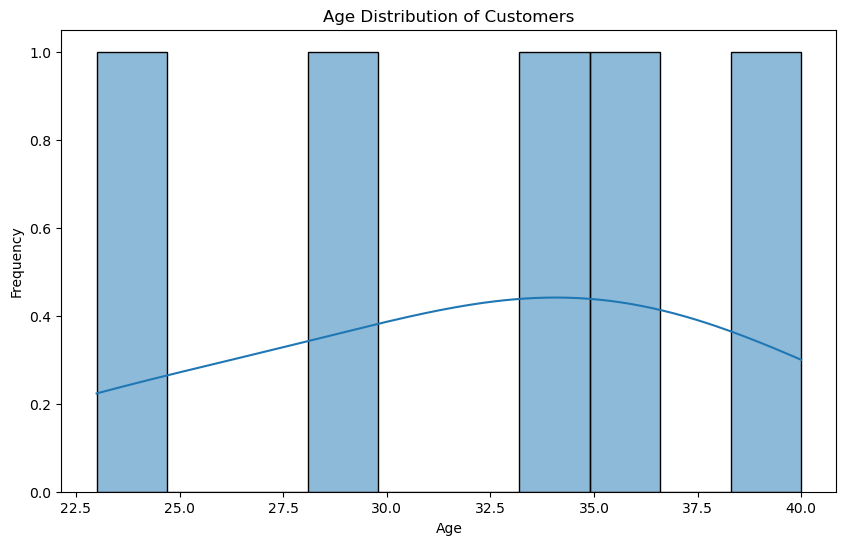

In [60]:
# Plot Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Business Insight:**

    You might observe that a majority of the customers are in the 25-40 age range. This helps in targeting marketing campaigns for these age groups.

**b) Gender vs. Product Category**

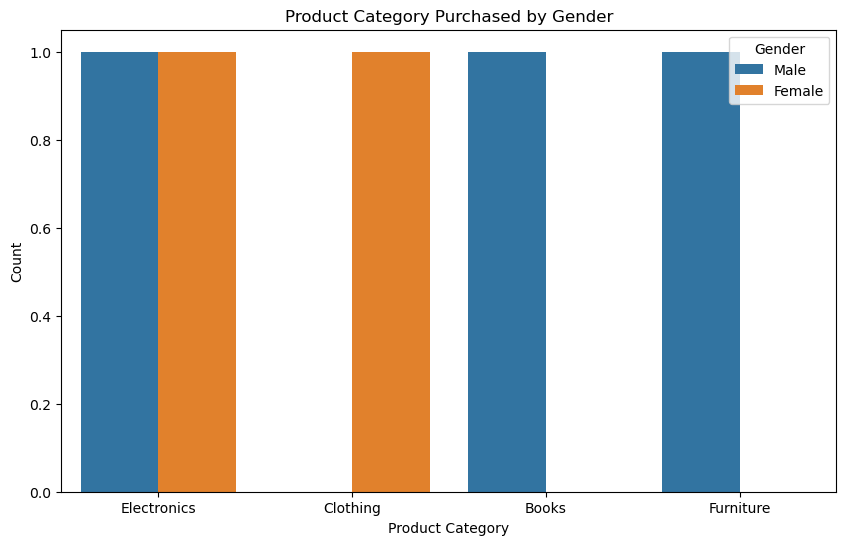

In [68]:
# Count plot for Gender vs Product Category
plt.figure(figsize=(10,6))
sns.countplot(x='Product_Category', hue='Gender', data=data)
plt.title('Product Category Purchased by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


**Business Insight:**

If you notice that females are more likely to purchase clothing, while males prefer electronics, you could recommend gender-specific promotions.

**c) Payment Method Preferences**


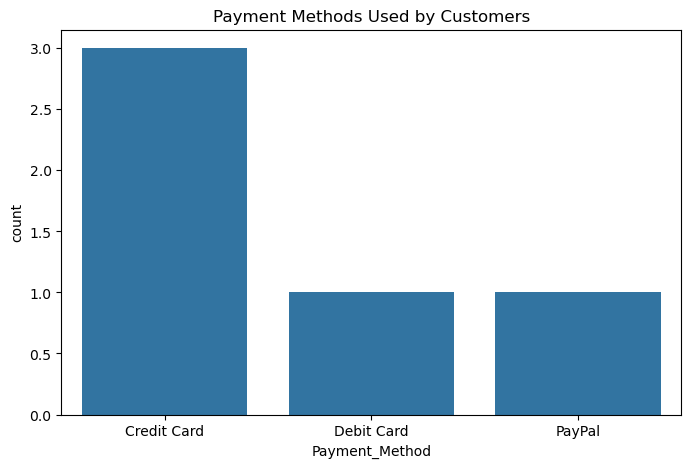

In [74]:
# Payment method distribution
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Payment_Method')
plt.title('Payment Methods Used by Customers')
plt.show()


**Business Insight:**

If the majority of customers use credit cards, the company might want to offer special credit card promotions or discounts.

### 7. Correlation Analysis
 

Check for correlations between numeric variables like price and age.


In [83]:
# # Correlation matrix
# correlation_matrix = data.corr()

# # Heatmap for visualization
# plt.figure(figsize=(8,6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


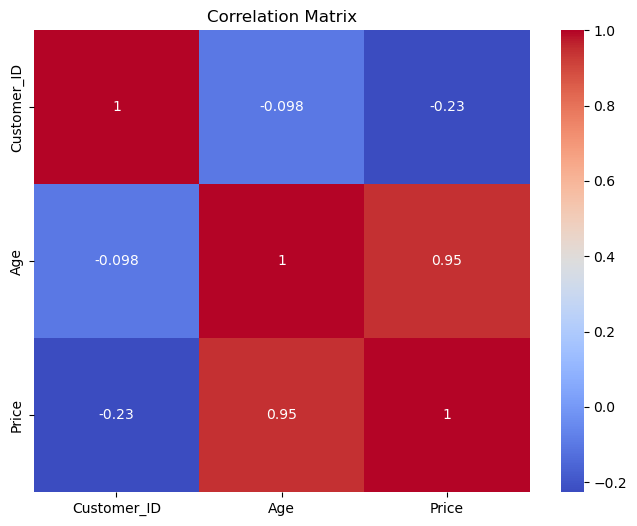

In [85]:
# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap for visualization
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Business Insight:**

For instance, if there’s a strong positive correlation between price and age, older customers may be spending more.

### 8. Advanced Insights Using Grouping
 

You can analyze customer behavior by grouping the data based on different attributes.


**a) Average Purchase by City**

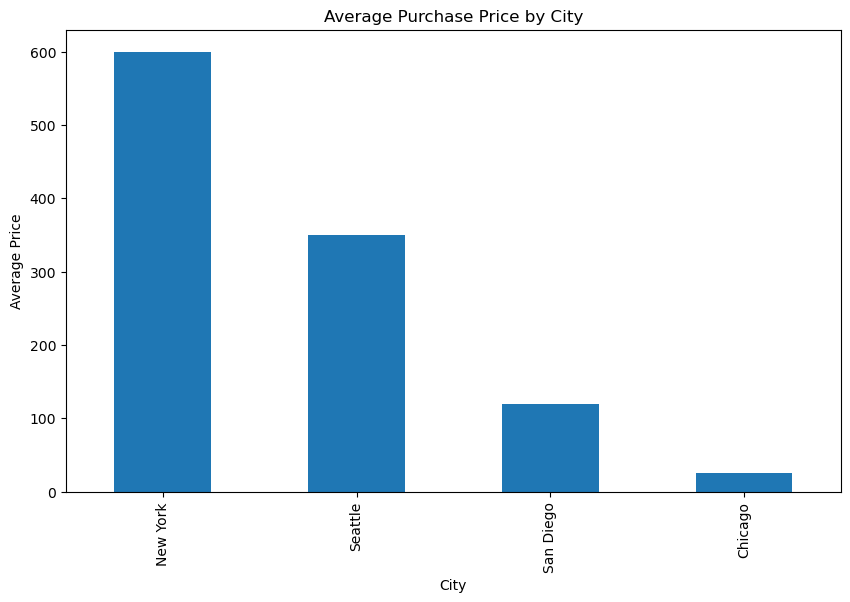

In [100]:
# Group by City and calculate mean price
city_avg_price = data.groupby('City')['Price'].mean().sort_values(ascending=False)

# Plotting the results
city_avg_price.plot(kind='bar', figsize=(10,6), title='Average Purchase Price by City')
plt.ylabel('Average Price')
plt.show()


**Business Insight:**
Identify cities with higher average purchases to focus marketing efforts there.

**b) Top Selling Product Categories**

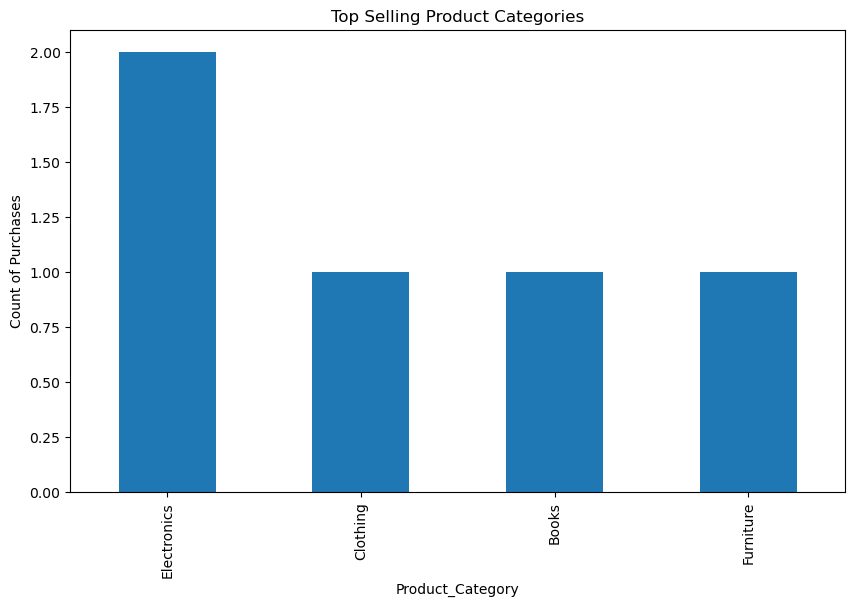

In [106]:
# Count of purchases by product category
top_products = data['Product_Category'].value_counts()

# Plot top-selling products
top_products.plot(kind='bar', figsize=(10,6), title='Top Selling Product Categories')
plt.ylabel('Count of Purchases')
plt.show()


**Business Insight:**
If electronics is the top-selling category, you might suggest stocking more electronics products and launching related promotions.

### 9. Identifying Anomalies or Outliers


Outliers can be identified using box plots, which helps spot any unusual customer behaviors.


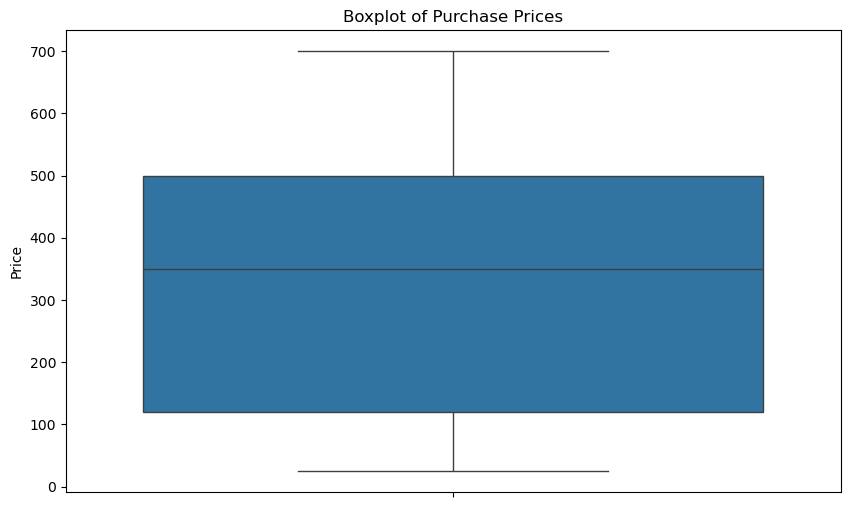

In [114]:
# Boxplot to find outliers in Price
plt.figure(figsize=(10,6))
sns.boxplot(data['Price'])
plt.title('Boxplot of Purchase Prices')
plt.show()


**Business Insight:**
High-priced outliers may indicate customers purchasing premium products. The company could target these high-spending customers with exclusive offers.

### 10. Key Findings and Recommendations

**After performing EDA, the following key findings can be drawn:**

- **Customer Age Group 25-40 **makes the most purchases. Target marketing efforts towards this group.
  
- **Electronics** is the highest-selling category. Increase inventory and promotions for electronics.
  
- **Credit Cards** are the most preferred payment method. Consider running credit card promotions to boost sales.
  
New York has the highest average purchase amount. Tailor city-specific marketing strategies.